In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("dark")

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
col = data.columns

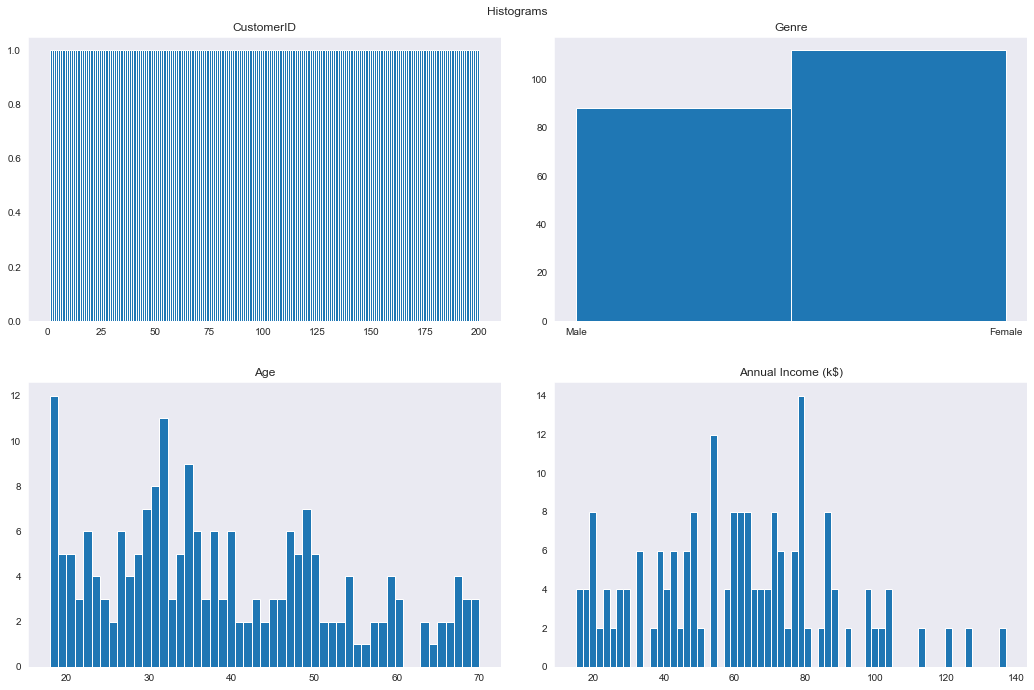

In [6]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.ravel()
fig.suptitle('Histograms')
for i in range(0, data.shape[1] - 1):
    ax[i].hist(data[col[i]], bins = np.size(data.iloc[:,i].unique()))
    ax[i].set_title(col[i])
fig.tight_layout(pad=3.0)

In [7]:
data['Age'].value_counts().head()

32    11
35     9
19     8
31     8
30     7
Name: Age, dtype: int64

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
cor = data.corr()

In [10]:
data_identifier = data['CustomerID']
data = data.drop('CustomerID', axis=1)

In [11]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


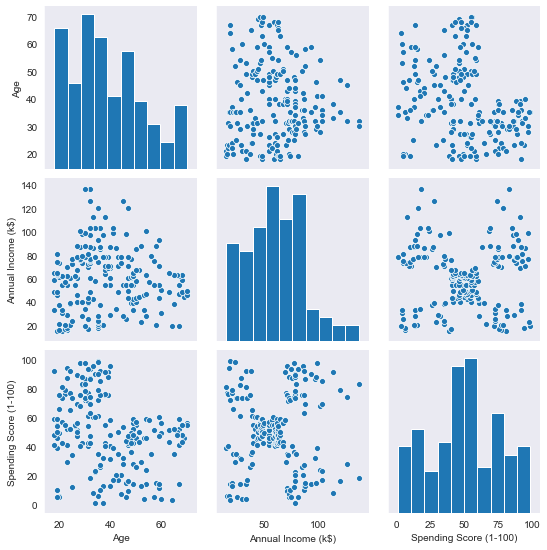

In [12]:
sns.pairplot(data)

In [13]:
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

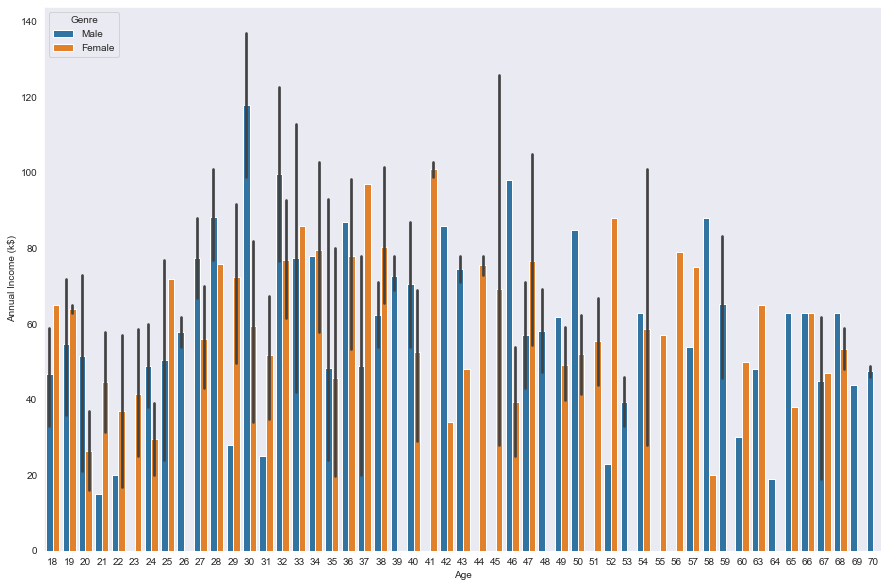

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x='Age',y='Annual Income (k$)',hue='Genre' ,data=data)

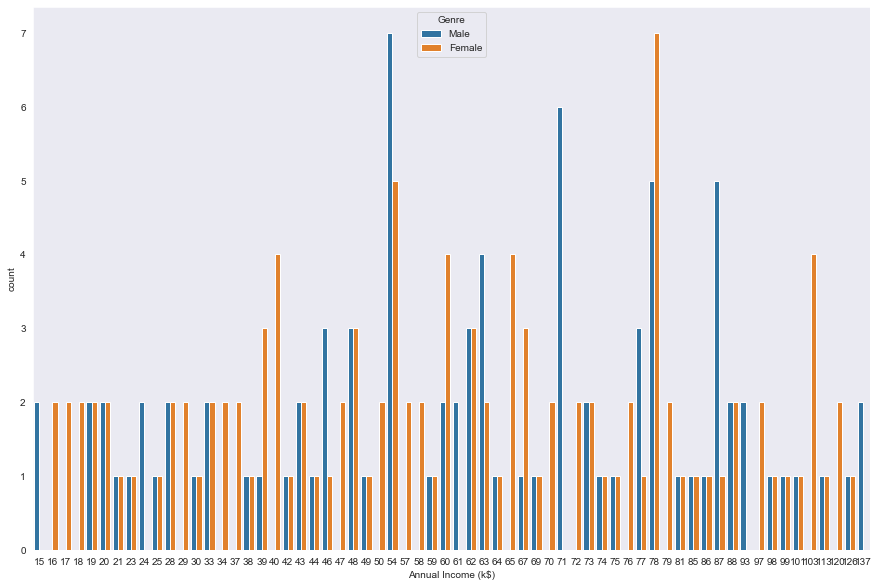

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(hue='Genre',x='Annual Income (k$)',data=data)

In [16]:
gender = pd.get_dummies(data['Genre'])

In [17]:
data = pd.concat([data.drop('Genre', axis=1),gender], axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop('Spending Score (1-100)', axis=1)
y = data['Spending Score (1-100)']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
m = RandomForestRegressor(n_jobs=-1)

In [23]:
m.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
predictions = m.predict(X_test)

In [25]:
Result = pd.DataFrame(y_test.values,predictions).reset_index()
Result.columns = ['Actual', 'Predictions']
Result['Difference'] = Result['Actual'] - Result['Predictions']
Result.head()

,Actual,Predictions,Difference
0,67.390000,73,-5.610000
1,49.130000,48,1.130000
2,78.970000,73,5.970000
3,49.303333,46,3.303333
4,48.832500,50,-1.167500


In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE :- {%0.03f}' %mean_absolute_error(y_test,predictions))
print('MSE :- {%0.03f}' %mean_squared_error(y_test,predictions))
print('RMSE :- {%0.03f}' %np.sqrt(mean_squared_error(y_test,predictions)))

MAE :- {17.505}
MSE :- {556.742}
RMSE :- {23.595}


In [27]:
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [28]:
data.drop(columns =['Age','Male','Female'], inplace=True)

In [29]:
data = data.sample(frac=1)

In [30]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
labels = k_means.labels_
labels

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0], dtype=int32)

In [32]:
np.unique(k_means.labels_)

array([0, 1], dtype=int32)

In [33]:
centers = k_means.cluster_centers_
centers

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

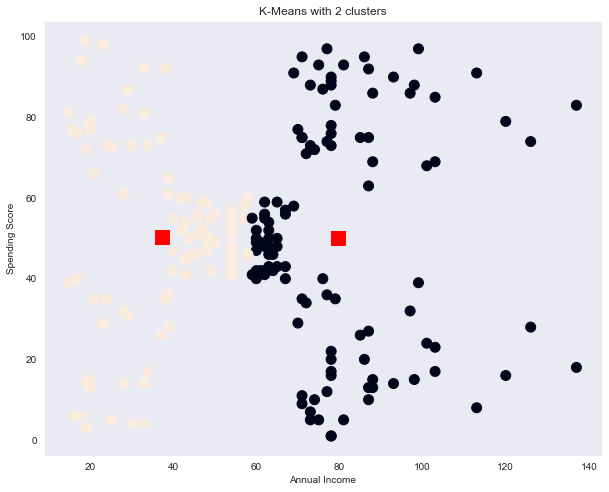

In [34]:
plt.figure(figsize=(10, 8))

plt.scatter(x='Annual Income (k$)',y = 'Spending Score (1-100)', c=labels, data=data, s=100)
plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [36]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data,labels)

In [37]:
score

0.2968969162503008

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

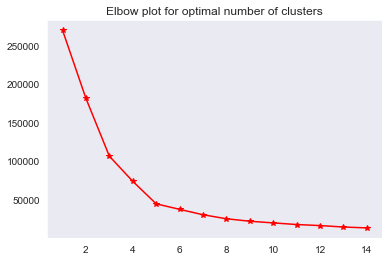

In [38]:
wscc= []
for i in range(1,15): 
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wscc.append(kmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="Red")
plt.title("Elbow plot for optimal number of clusters")

In [39]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
labels_5 = k_means.labels_
labels_5

array([3, 0, 3, 0, 0, 0, 2, 1, 1, 3, 1, 0, 3, 0, 0, 3, 2, 4, 0, 0, 2, 3,
       2, 0, 2, 0, 0, 1, 4, 4, 0, 1, 1, 1, 3, 1, 2, 0, 1, 1, 1, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 4, 3, 0, 1, 1, 1, 4, 0, 3, 3, 0, 2, 3, 2,
       0, 0, 2, 1, 2, 0, 0, 1, 4, 0, 2, 2, 0, 0, 0, 1, 0, 0, 4, 0, 1, 0,
       2, 0, 2, 0, 2, 0, 1, 3, 4, 3, 0, 3, 0, 0, 2, 4, 1, 1, 4, 2, 1, 0,
       0, 1, 0, 0, 2, 4, 3, 0, 0, 0, 1, 4, 1, 0, 0, 0, 3, 0, 4, 3, 1, 2,
       0, 0, 0, 0, 0, 0, 4, 1, 0, 1, 1, 3, 4, 4, 1, 4, 0, 4, 0, 2, 1, 3,
       3, 0, 3, 3, 0, 0, 3, 1, 3, 0, 3, 0, 0, 3, 4, 0, 2, 3, 0, 0, 1, 3,
       3, 0, 0, 3, 0, 0, 1, 3, 4, 0, 0, 3, 0, 4, 2, 3, 4, 0, 0, 0, 2, 0,
       3, 1], dtype=int32)

In [41]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [42]:
centers_5 = k_means.cluster_centers_

centers_5

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

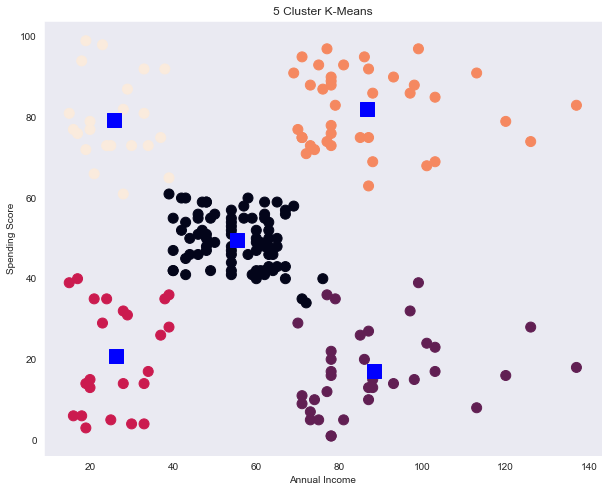

In [43]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers_5[:,0], centers_5[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

In [44]:
score_5 = metrics.silhouette_score(data, k_means.labels_)

print("Score = ", score_5)

Score =  0.553931997444648


In [45]:
from sklearn.metrics import silhouette_samples

In [46]:
score_1 = metrics.silhouette_samples(data, k_means.labels_, metric='euclidean')
print("Score = ", score_1)

Score =  [ 0.32604311  0.66736088  0.65368602  0.61927606  0.74739227  0.68358333
  0.58581667  0.53389918  0.55652321  0.51455576  0.57181215  0.52148137
  0.61933811  0.64014053  0.4988398   0.59982837  0.63021343  0.62355268
  0.70652524  0.70493684  0.6399526   0.57689717  0.39230007  0.64920886
  0.60922585  0.6324437   0.74062737  0.46477526  0.52897452  0.6847372
  0.73150424  0.57147203  0.57321049 -0.02338083  0.48194179  0.51127799
  0.41700493  0.59860522  0.34080466  0.60779683  0.5718828   0.59367906
  0.71512793  0.65596358  0.36620886  0.45197042  0.6681954   0.71947278
  0.72079722  0.2254125   0.60554668  0.63100118  0.63936997  0.56463752
  0.52881485  0.51997252  0.60637819  0.56138124  0.48378692  0.55806656
  0.61857464  0.63322429  0.68126272  0.66126882  0.33124639  0.67788678
  0.66933998  0.58468938  0.64167396  0.56143587  0.57697817  0.75806935
  0.34144075  0.38313815  0.6964831   0.38841392 -0.00927769  0.48931822
  0.66547762  0.50415514  0.48988757  0.381

In [50]:
model_aff = AffinityPropagation(damping=0.9)
model_aff.fit(data)
#
yhat_aff = model_aff.predict(data)
clusters_aff = np.unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [0 1 2 3 4 5 6 7 8 9]


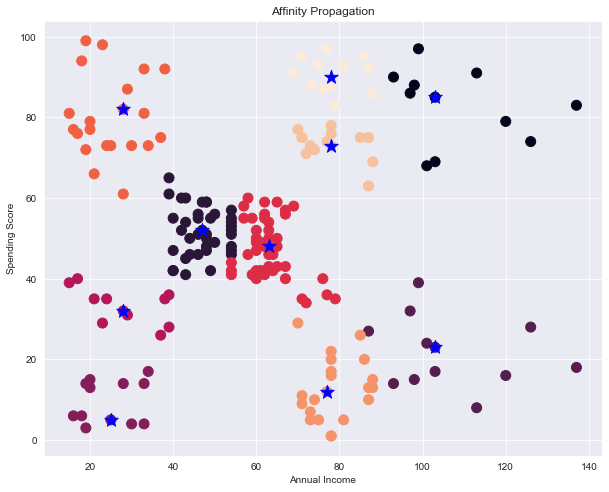

In [53]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_aff, s=100)

plt.scatter(centroids_aff[:,0], centroids_aff[:,1], color='blue', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Affinity Propagation')
plt.grid()
plt.show()

In [54]:
score_aff = metrics.silhouette_score(data,labels_aff)

print("Score of Affinity Propagation = ", score_aff)

Score of Affinity Propagation =  0.44419901773161946


In [55]:
model_br = Birch(threshold=0.01, n_clusters=5)
model_br.fit(data)
#
yhat_br = model_br.predict(data)
clusters_br = np.unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_

Clusters of Birch [0 1 2 3 4]


In [56]:
score_br = metrics.silhouette_score(data,labels_br)

print("Score of Birch = ", score_br)

Score of Birch =  0.5529945955148896


In [57]:
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values

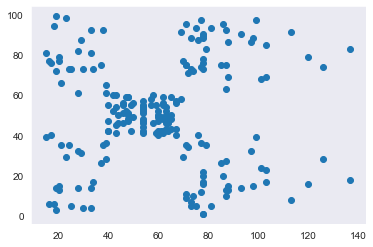

In [58]:
# define the model
model = DBSCAN(eps=0.7, min_samples=90)
# fit model and predict clusters
yhat = model.fit_predict(data_X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

In [59]:
model_mini = MiniBatchKMeans(n_clusters=2)
model_mini.fit(data)
#
yhat_mini = model_mini.predict(data)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1]


Text(0.5, 1.0, 'Elbow plot for Mini Batch KMeans')

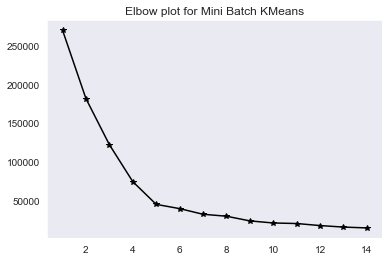

In [60]:
wscc = []
for i in range(1,15): 
    mkmeans = MiniBatchKMeans(n_clusters=i, init="k-means++",random_state=0)
    mkmeans.fit(data)
    wscc.append(mkmeans.inertia_)  

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for Mini Batch KMeans")

In [61]:
model_mini = MiniBatchKMeans(n_clusters=5)
model_mini.fit(data)
#
yhat_mini = model_mini.predict(data)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

Clusters of Mini Batch KMeans. [0 1 2 3 4]


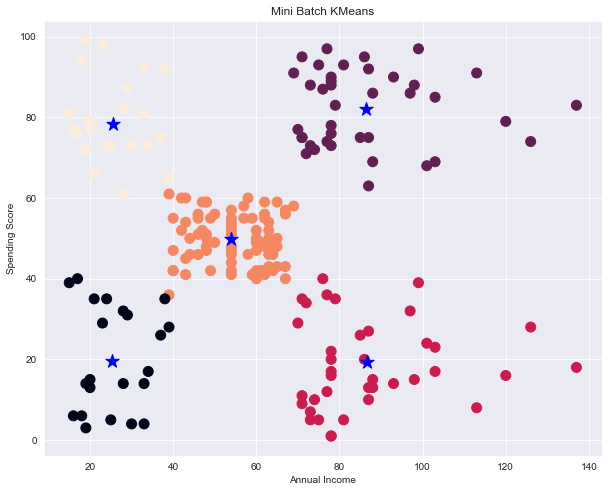

In [63]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_mini, s=100)

plt.scatter(centroids_mini[:,0], centroids_mini[:,1], color='blue', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mini Batch KMeans')
plt.grid()
plt.show()

In [64]:
score_mini = metrics.silhouette_score(data,labels_mini)

print("Score of Birch = ", score_mini)

Score of Birch =  0.5519859348389322


In [65]:
model_ms = MeanShift(bandwidth=25)
model_ms.fit(data)
#
yhat_ms = model_ms.predict(data)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift.",clusters_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_

Clusters of Mean Shift. [0 1 2 3 4]


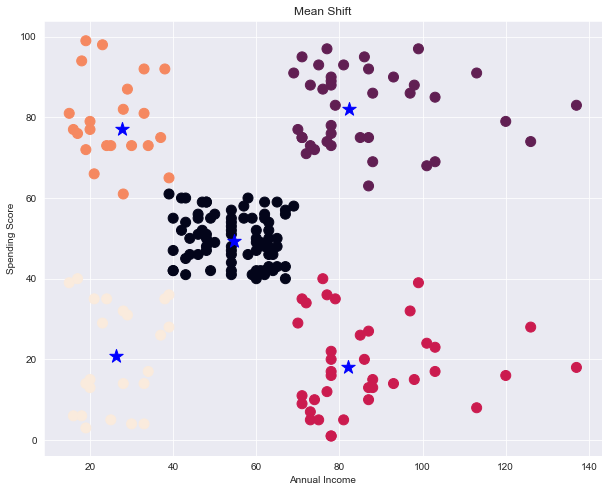

In [67]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=labels_ms, s=100)

plt.scatter(centroids_ms[:,0], centroids_ms[:,1], color='blue', marker='*', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Mean Shift')
plt.grid()
plt.show()

In [68]:
score_ms = metrics.silhouette_score(data,labels_ms)

print("Score of Mean Shift = ", score_ms)

Score of Mean Shift =  0.5513250428036423


In [70]:
model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(data)
clusters_op = unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

Clusters of Mean Shift. [-1  0  1  2  3  4  5  6]


In [71]:
score_op = metrics.silhouette_score(data,labels_op)

print("Score of Mean Shift = ", score_op)

Score of Mean Shift =  -0.0434148857475731


In [72]:
model_sc = SpectralClustering(n_clusters=5)
#
yhat_sc = model_sc.fit_predict(data)
clusters_sc = unique(yhat_sc)
print("Clusters of Mean Shift.",clusters_sc)
labels_sc = model_sc.labels_

Clusters of Mean Shift. [0 1 2 3 4]


In [73]:
score_sc = metrics.silhouette_score(data,labels_sc)

print("Score of Mean Shift = ", score_sc)

Score of Mean Shift =  0.2900916171834226


In [74]:
from numpy import unique
from numpy import where
data_X = data.iloc[:,[0,1]].values

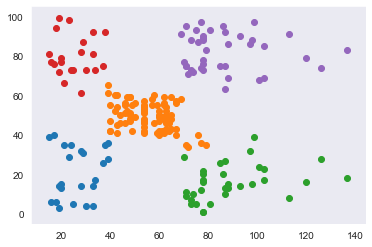

In [75]:
model_gb = GaussianMixture(n_components=5)
model_gb.fit(data_X)
#
yhat_gb = model_gb.predict(data_X)
clusters_gb = unique(yhat_gb)
# create scatter plot for samples from each cluster
for cluster in clusters_gb:
	# get row indexes for samples with this cluster
	row_ix = where(yhat_gb == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

In [76]:
model_agg = AgglomerativeClustering(n_clusters=5)
#
yhat_agg = model_agg.fit_predict(data)
clusters_agg = unique(yhat_agg)
print("Clusters of Mini Batch KMeans.",clusters_agg)
labels_agg = model_agg.labels_

Clusters of Mini Batch KMeans. [0 1 2 3 4]


In [77]:
score_agg = metrics.silhouette_score(data,labels_agg)

print("Score of Mean Shift = ", score_agg)

Score of Mean Shift =  0.5529945955148896
